[2022-11-15 22:08:56,527] INFO [Config:165] Loaded config from /home/snikiel/Documents/REPOS/mel-steg-cINN/config.yml
[2022-11-15 22:08:56,682] INFO [datasets:38] Validation dataset size: 1


Validation set example
Result:
L shape: torch.Size([1, 512, 512])
ab shape: torch.Size([2, 512, 512])
Label: ('melspectrogram_00000',)


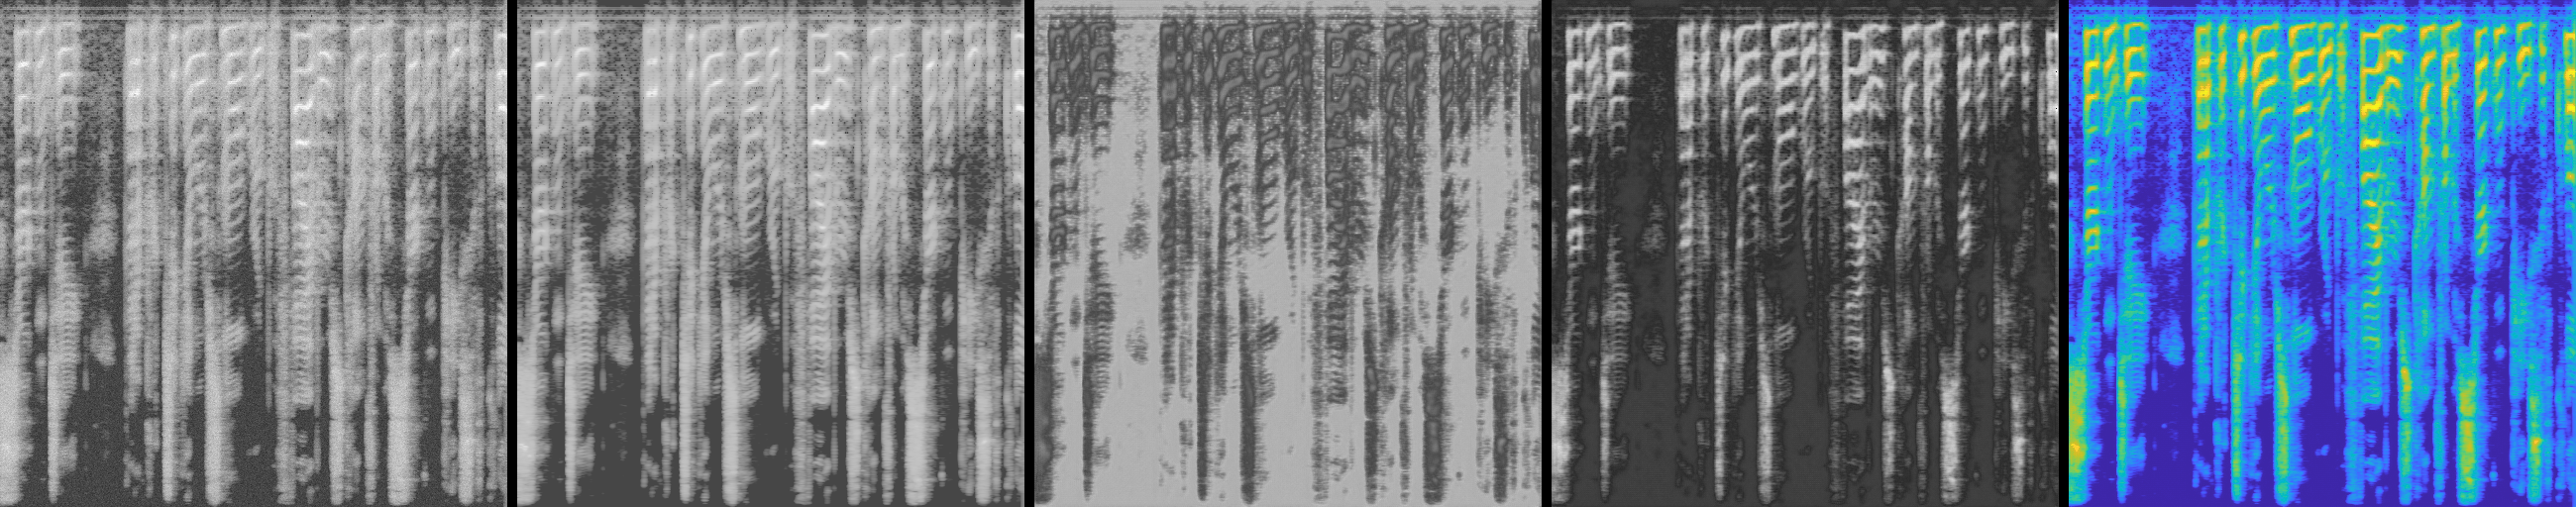

Target:
L shape: torch.Size([1, 512, 512])
ab shape: torch.Size([2, 512, 512])
Label: ('melspectrogram_00000',)


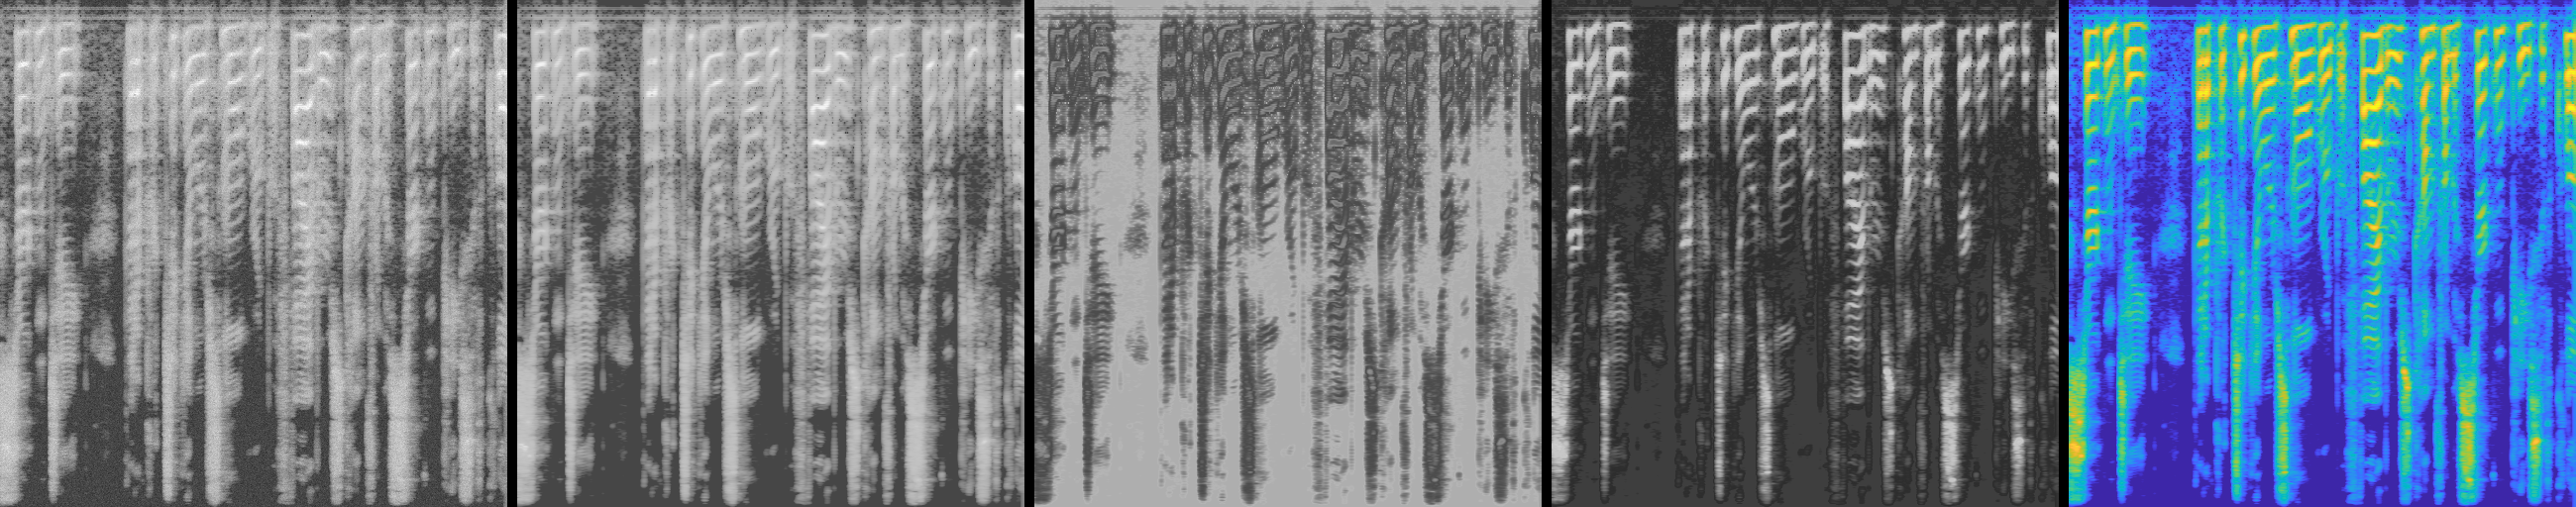

In [1]:
import torch
import utilities
import IPython
from config import config
from datasets import SpectrogramsDataset
from noise import GaussianNoise
from visualization import predict_example    
    
dataset = SpectrogramsDataset(config.common.dataset_location,
                                train=False,
                                size=10,
                                augmentor=GaussianNoise([0.0], [0.001, 0.001, 0.0])) 

from Models.UNET.unet_models import UNet_256_2
model = torch.load(config.cinn_management.feature_net_path, map_location=utilities.get_device(verbose=False))
model.eval()

predict_example(model, dataset, desc="Validation set example", restore_audio=True)

[2022-11-15 22:09:37,609] INFO [datasets:38] Validation dataset size: 1


Validation set example
Target:
L shape: torch.Size([1, 512, 512])
ab shape: torch.Size([2, 64, 64])
Label: ('melspectrogram_00000',)


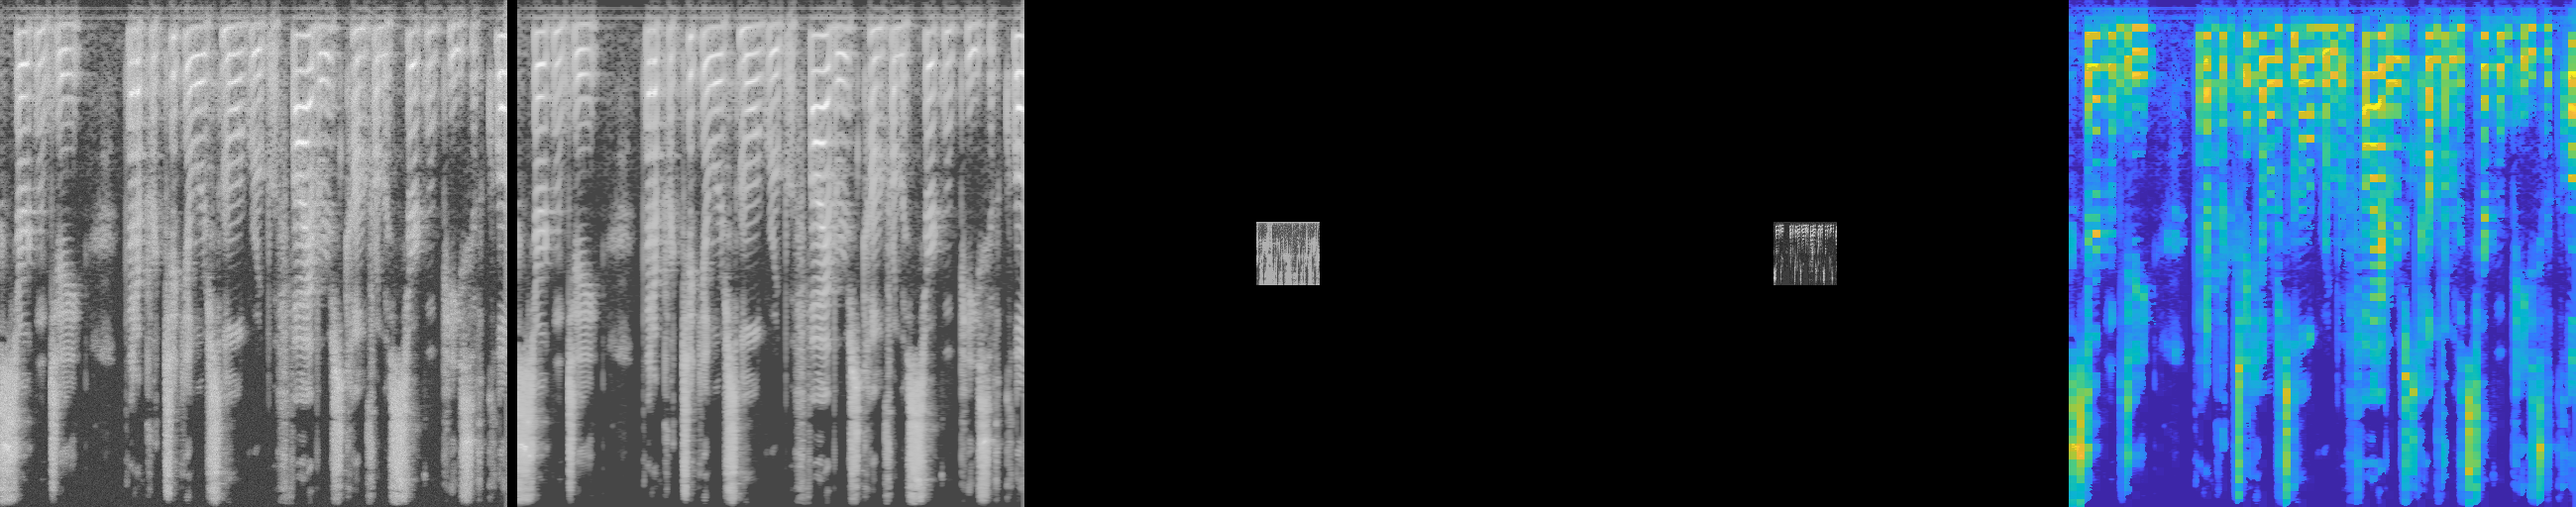

Result:
L shape: torch.Size([1, 512, 512])
ab shape: torch.Size([2, 64, 64])
Label: ('melspectrogram_00000',)


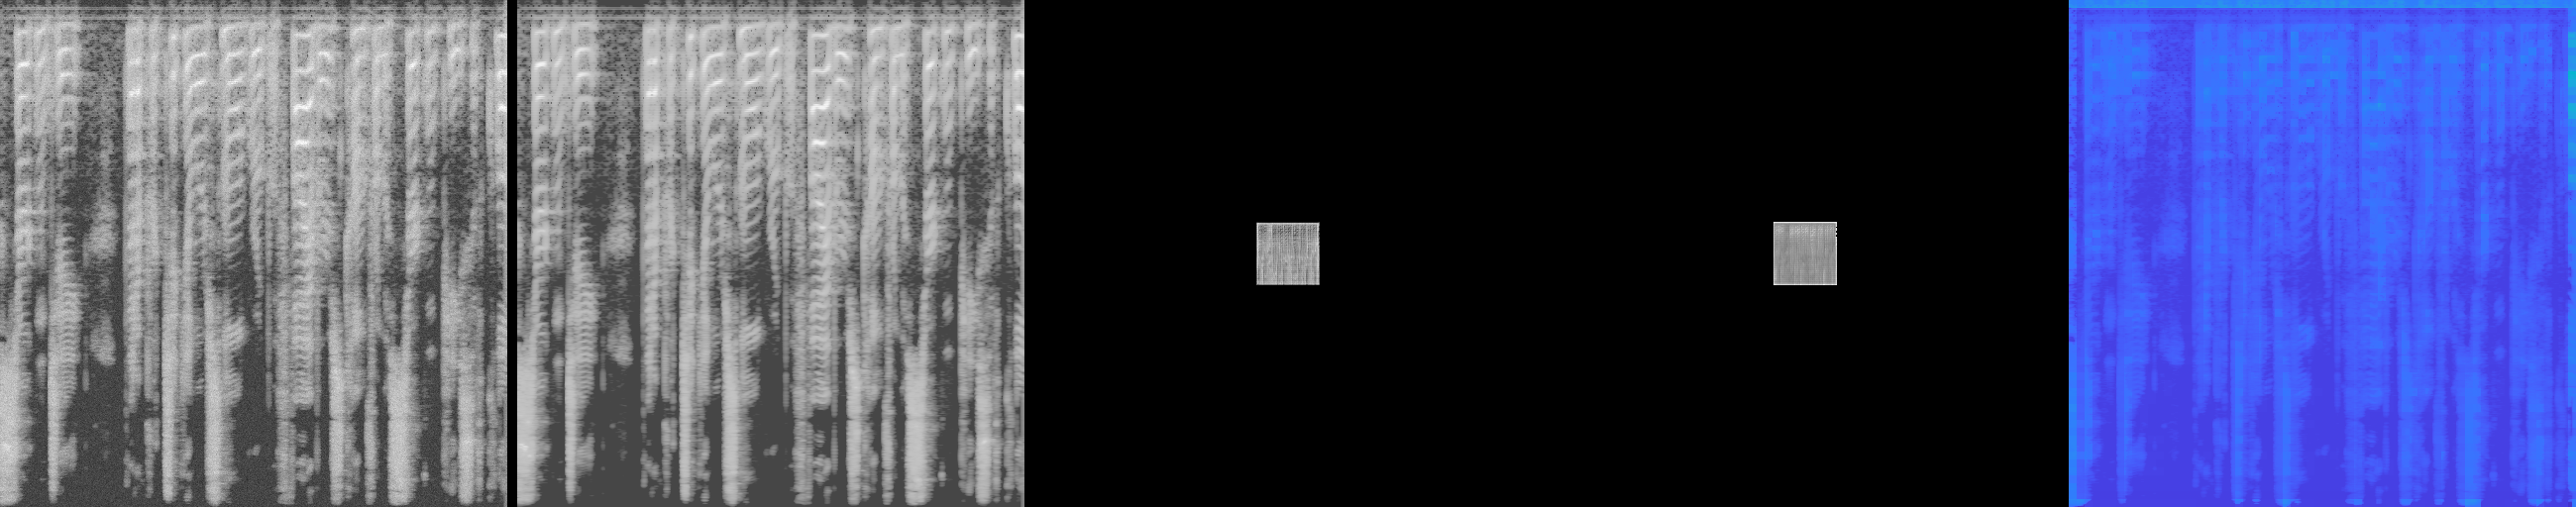

In [2]:
import wandb
import colorization_cINN.model as model
from config import config
from datasets import SpectrogramsDataset
from noise import GaussianNoise
from visualization import predict_cinn_example
import torch.nn.functional as F
import utilities

MODEL_FILE_NAME = "cinn_model.pt"
load = "snikiel/cINN/3ufcrf7b"

cinn_builder = model.cINN_builder(config.cinn_training)
    
feature_net = cinn_builder.get_feature_net()
fc_cond_net = cinn_builder.get_fc_cond_net()
cinn, cinn_output_dimensions = cinn_builder.get_cinn()
        
cinn_model = model.WrappedModel(feature_net, fc_cond_net, cinn)
cinn_training_utilities = model.cINNTrainingUtilities(cinn_model, config.cinn_training)

dataset = SpectrogramsDataset(config.common.dataset_location,
                                train=False,
                                size=10,
                                augmentor=GaussianNoise([0.0], [0.001, 0.001, 0.0])) 

restored_model = wandb.restore(MODEL_FILE_NAME, run_path=load)
cinn_training_utilities.load(restored_model.name)
cinn_model = cinn_training_utilities.model
cinn_model.eval()

predict_cinn_example(cinn_model, cinn_output_dimensions, dataset, config.cinn_training, desc="Validation set example", restore_audio=True)